# CSE 555 Introduction to Pattern Recognition Spring 2020
# Problem Set 5 - Generative Models
## Srisai Karthik Neelamraju, 50316785 neelamra@buffalo.edu

## 1. Derive the restricted Boltzmann machine algorithm and explain your derivation.

Restricted Boltzmann machines (RBMs) are a type of generative neural networks that belong to the class of energy based methods. They are undirected probabilistic graphical models that can also be thought of as neural networks with two layers - a visible layer and a hidden layer. An RBM aims to define a distribution over the nodes in the visible layer (called visible nodes/features) using those in the hidden layer (called hidden nodes/features).

Let us assume $\mathbf{x}$ to denote the visible nodes and $\mathbf{h}$ to denote the hidden nodes. Besides, let $\mathbf{W}$, $\mathbf{b}$ and $\mathbf{c}$ represent the parameters of the model. If $(n_{\mathbf{x}}, 1)$ and $(n_{\mathbf{h}}, 1)$ respectively are the dimensions of $\mathbf{x}$ and $\mathbf{h}$, then the dimensions of $\mathbf{W}$ are $(n_{\mathbf{h}}, n_\mathbf{x})$. Also, $\mathbf{c}$ and $\mathbf{b}$ are the biases associated with $\mathbf{x}$ and $\mathbf{h}$ respectively, and have same dimensions as the latter. For this explanation, a binary RBM is considered. This means that each node in $\mathbf{x}$ and $\mathbf{h}$ belong to $\{0, 1\}$.

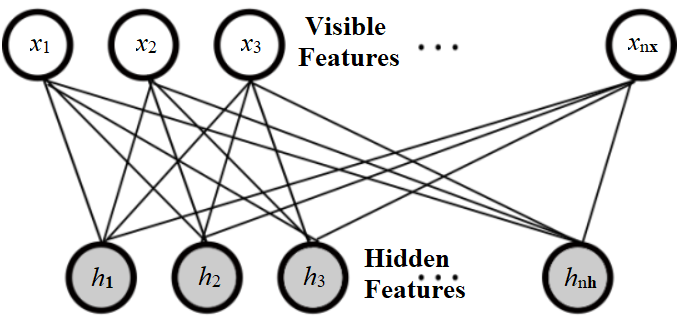

**Background:** The energy function of this RBM is linear in terms of its visible and hidden nodes. It is defined as,

\begin{aligned} E(\mathbf{x}, \mathbf{h}) &=-\mathbf{h}^{\top} \mathbf{W} \mathbf{x}-\mathbf{c}^{\top} \mathbf{x}-\mathbf{b}^{\top} \mathbf{h} \\ &=-\sum_{j} \sum_{k} W_{jk} h_{j} x_{k}-\sum_{k} c_{k} x_{k}-\sum_{j} b_{j} h_{j} \end{aligned}

This energy function $E(\mathbf{x}, \mathbf{h})$ defines the joint probability distribution over the visible and the hidden nodes, i.e, $p(\mathbf{x}, \mathbf{h})$, given by,

\begin{aligned} p(\mathbf{x}, \mathbf{h}) = \frac{e^{-E(\mathbf{x}, \mathbf{h})}}{Z} \end{aligned}

Here, $Z$ is the partition function and it is the sum of $e^{-E(\mathbf{x}, \mathbf{h})}$ over all possible combinations of $\mathbf{x}$ and $\mathbf{h}$. However, this value is intractable. Further, the marginal probability distribution $p(\mathbf{x})$ can be written in terms of the energy function as,

\begin{aligned} p(\mathbf{x}) &= \sum_{\mathbf{h}} p(\mathbf{x}, \mathbf{h}) \\
&= \sum_{\mathbf{h}} \frac{e^{-E(\mathbf{x}, \mathbf{h})}}{Z} \\
&= \frac{\sum_{\mathbf{h}} e^{-E(\mathbf{x}, \mathbf{h})}}{\sum_{\mathbf{x}, \mathbf{h}} e^{-E(\mathbf{x}, \mathbf{h})}} \end{aligned}

Also, since the nodes in the visible layer are mutually independent and those in the hidden layer also satisfy this property, the conditional probabilities $p(\mathbf{x}|\mathbf{h})$ and $p(\mathbf{h}|\mathbf{x})$ can be written as,

\begin{aligned} p\left(\mathbf{x}|\mathbf{h}\right) = \prod_{k} p\left(x_{k} | \mathbf{h}\right) \end{aligned}

\begin{aligned} p\left(\mathbf{h}|\mathbf{x}\right) = \prod_{j} p\left(h_{j} | \mathbf{x}\right) \end{aligned}

In the binary RBM, the conditional probability of a visible node being active conditional on the hidden nodes is given by,

\begin{aligned} p\left(x_{k}=1 | \mathbf{h}\right) =\frac{1}{1+\exp \left(-\left(c_{k}+\mathbf{h}^{\top} \mathbf{W}_{\cdot k}\right)\right)} =\sigma\left(c_{k}+\mathbf{h}^{\top} \mathbf{W}_{\cdot k}\right) \end{aligned}

Subsequently, the conditional probability of a hidden node being active conditional on the visible nodes is given by,

\begin{aligned} p\left(h_{j}=1 | \mathbf{x}\right) =\frac{1}{1+\exp \left(-\left(b_{j}+\mathbf{W}_{j \cdot}\mathbf{x}\right)\right)} =\sigma\left(b_{j}+\mathbf{W}_{j \cdot} \mathbf{x}\right) \end{aligned}

**Training:** Let us assume the training data consists of $T$ examples $\mathbf{x}^{(1)}$, $\mathbf{x}^{(2)}$, .., $\mathbf{x}^{(T)}$. The objective function is the average negative log-likelihood function of the training data. We aim to minimize the function $\frac{1}{T} \sum_{t} -\log p\left(\mathbf{x}^{(t)}\right)$ through gradient descent. Let $\cal L = -\log p\left(\mathbf{x}^{(t)}\right)$.

From the expression for $p(\mathbf{x})$, the gradients of $\cal L$ with respect to $\mathbf{W}$, $\mathbf{c}$ and $\mathbf{b}$ are given by,

\begin{aligned}
\frac{\partial \cal L}{\partial \mathbf{W}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{W}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{x},\mathbf{h}}\left[\frac{\partial E({\mathbf{x}}, \mathbf{h})}{\partial \mathbf{W}}\right] \\
\frac{\partial \cal L}{\partial \mathbf{c}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{c}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{x},\mathbf{h}}\left[\frac{\partial E({\mathbf{x}}, \mathbf{h})}{\partial \mathbf{c}}\right] \\
\frac{\partial \cal L}{\partial \mathbf{b}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{b}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{x},\mathbf{h}}\left[\frac{\partial E({\mathbf{x}}, \mathbf{h})}{\partial \mathbf{b}}\right]
\end{aligned}

However, as described previously, the second term that contains summation over both $\mathbf{x}$ and $\mathbf{h}$ is intractable to compute. Therefore, in order to perform gradient descent effectively, this term has to be somehow approximated. This approximation is achieved using **Contrastive Divergence** algorithm. The key idea of this algorithm is to replace the expectation over $\mathbf{x}$ by a point estimation $\tilde{\mathbf{x}}$ that is obtained by Gibbs sampling starting at $\mathbf{x}^{(t)}$. In other words, we first sample $\mathbf h^1\sim p(\mathbf h|\mathbf x^{(t)})$. Later, we sample $\mathbf x^1\sim p(\mathbf x|\mathbf h^1)$. This process is repeated for several ($k-1$) times before sampling $\tilde{\mathbf x}=\mathbf x^k\sim p(\mathbf x|\mathbf h^{k})$. Using this point estimate $\tilde{\mathbf{x}}$, the above gradient expressions can be rewritten as,

\begin{aligned}
\frac{\partial \cal L}{\partial \mathbf{W}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{W}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{h}}\left[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \mathbf{W}}\right] \\
\frac{\partial \cal L}{\partial \mathbf{c}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{c}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{h}}\left[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \mathbf{c}}\right] \\
\frac{\partial \cal L}{\partial \mathbf{b}} &= E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \mathbf{b}} | \mathbf{x}^{(t)}\right]-E_{\mathbf{h}}\left[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \mathbf{b}}\right]
\end{aligned}

From the definition of the energy function $E(\mathbf{x}, \mathbf{h})$, its gradients with respect to $\mathbf{W}$, $\mathbf{b}$ and $\mathbf{c}$ are given by,

\begin{aligned}
&\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial W_{jk}} = -h_jx_k \Rightarrow \frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \mathbf{W}} = -\mathbf{h}\mathbf{x}^{\top} \\
&\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial c_{k}} = -x_k \Rightarrow \frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \mathbf{c}} = -\mathbf{x} \\
&\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial b_{j}} = -h_j \Rightarrow \frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \mathbf{b}} = -\mathbf{h}
\end{aligned}

Upon substituting these three expressions in the above expressions corresponding to the gradients of the loss function, we get

\begin{aligned}
\frac{\partial \cal L}{\partial \mathbf{W}} &= \mathbf{h}(\tilde{\mathbf{x}}) \tilde{\mathbf{x}}^{\top} - \mathbf{h}\left(\mathbf{x}^{(t)}\right) \mathbf{x}^{(t)^{\top}} \\
\frac{\partial \cal L}{\partial \mathbf{c}} &= \tilde{\mathbf{x}} - \mathbf{x}^{(t)} \\
\frac{\partial \cal L}{\partial \mathbf{b}} &= \mathbf{h}(\tilde{\mathbf{x}}) - \mathbf{h}\left(\mathbf{x}^{(t)}\right)
\end{aligned}

Finally, the parameters $\mathbf{W}$, $\mathbf{b}$ and $\mathbf{c}$ are updated using gradient descent with learning rate $\alpha$ as follows,

\begin{aligned}
\mathbf{W} &= \mathbf{W} - \alpha\frac{\partial \cal L}{\partial \mathbf{W}} = \mathbf{W} + \alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right) \mathbf{x}^{(t)^{\top}}-\mathbf{h}(\tilde{\mathbf{x}}) \tilde{\mathbf{x}}^{\top}\right)\\
\mathbf{c} &= \mathbf{c} - \alpha\frac{\partial \cal L}{\partial \mathbf{b}} = \mathbf{c} + \alpha\left(\mathbf{x}^{(t)}-\tilde{\mathbf{x}}\right) \\
\mathbf{b} &= \mathbf{b} - \alpha\frac{\partial \cal L}{\partial \mathbf{c}} = \mathbf{b} + \alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right)-\mathbf{h}(\tilde{\mathbf{x}})\right)
\end{aligned}

In this way, the RBM algorithm can be derived. The exact algorithm is implemented below to generate MNIST images.

## Implementing RBM to generate MNIST images

### Importing the required libraries

NumPy is used for basic matrix operations.<br>
TensorFlow is used to implement the neural networks and import the MNIST dataset.<br>
Matplotlib is used for visualizing images generated by the RBM.<br>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
from matplotlib import pyplot as plt
from math import floor

### Loading the MNIST dataset

MNIST Dataset contains 28 $\times$ 28 dimensional grayscale images of handwritten digits from 0 to 9. Specifically, there are 60,000 images in the training set and 10,000 images in the test set. Each of these 70,000 images belongs to one of these 10 classes and has associated with it a label from 0 to 9.

In [0]:
# loading the dataset
(X_train, _), (X_test, _) = mnist.load_data()
x_dim, y_dim = X_train[0].shape
img_size = x_dim * y_dim

# reshaping the arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# normalizing the data
X_train = X_train / 255
X_test = X_test / 255

# shuffling the test set
np.random.shuffle(X_test)

# converting the images to binary values
X_train[X_train >= 0.5] = 1
X_train[X_train < 0.5] = 0
X_test[X_test >= 0.5] = 1
X_test[X_test < 0.5] = 0

### Creating a class for implementing a Restricted Boltzmann Machine

In [0]:
class RBM:
    """
        implements a restricted Boltzmann machine (RBM)
    """

    def __init__(self, n_visible, n_hidden):
        """
            initializes an RBM
        """
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.W = np.random.random((n_visible, n_hidden))
        self.c = np.random.random((n_visible, 1))
        self.b = np.random.random((n_hidden, 1))

    def train(self, X, steps=30, batch_size=32, k=1, lr=0.1):
        """
            trains the RBM on the MNIST training set
        """
        print("Training the RBM for " + str(steps) + " steps with batch size " + str(batch_size) + "...")
        n_upds_per_epoch = X.shape[0] // batch_size
        np.random.shuffle(X)
        for i in range(steps):
            if i % 1000 == 0:
                print(i, end=' ')
            rem = i % n_upds_per_epoch
            if rem == 0:
                np.random.shuffle(X)
            X_batch = X[rem*batch_size : (rem+1)*batch_size]
            dW = dc = db = 0
            for xt in X_batch:
                xt = xt.reshape(self.n_visible, 1)
                ht = self.sample_h(xt).reshape(self.n_hidden, 1)
                x_ = xt.copy()
                for _ in range(k):
                    h_ = np.random.binomial(1, p=self.sample_h(x_))
                    x_ = np.random.binomial(1, p=self.sample_x(h_))
                h_ = h_.reshape(self.n_hidden, 1)
                x_ = x_.reshape(self.n_visible, 1)
                dW += np.dot(xt, ht.T) - np.dot(x_, h_.T)
                dc += xt - x_
                db += ht - h_
            self.W += lr * (dW/batch_size)
            self.c += lr * (dc/batch_size)
            self.b += lr * (db/batch_size)
        print("DONE")

    def sample_h(self, x):
        """
            samples h, conditional on x
        """
        return self.sigmoid(np.dot(self.W.T, x) + self.b)

    def sample_x(self, h):
        """
            samples x, conditional on h
        """
        return self.sigmoid(np.dot(self.W, h) + self.c)

    def generate_images(self, X, p, n=25):
        """
            generates images from the RBM
        """
        print("Generating some images from the trained RBM")
        X = X[np.random.choice(X.shape[0], n)]
        for i in range(len(p)):
            print("Images with " + str(p[i]) + "% pixels removed")
            fig = plt.figure(figsize=(7, 7))
            for j in range(n):
                x = X[j].copy()
                one_locs = np.where(x == 1)[0]
                n_pxl = floor((p[i]/100)*len(one_locs))
                pxl_locs = np.random.choice(one_locs, n_pxl, False)
                x[pxl_locs] = 0
                sub = fig.add_subplot(5, 5, j + 1)
                x = x.reshape(self.n_visible, 1)
                x_ = self.sample_x(self.sample_h(x))
                x_[x_ >= 0.5] = 1
                x_[x_ < 0.5] = 0
                sub.imshow(x_.reshape(x_dim, y_dim), cmap='gray')
                plt.axis('off')
            plt.show()

    def sigmoid(self, x):
        """
            computes sigmoid of the argument
        """
        return 1/(1 + np.exp(-x))

### RBM with 20 hidden nodes

Training the RBM for 10000 steps with batch size 32...
0 1000 2000 3000 4000 5000 6000 7000 8000 9000 DONE
Generating some images from the trained RBM
Images with 20% pixels removed


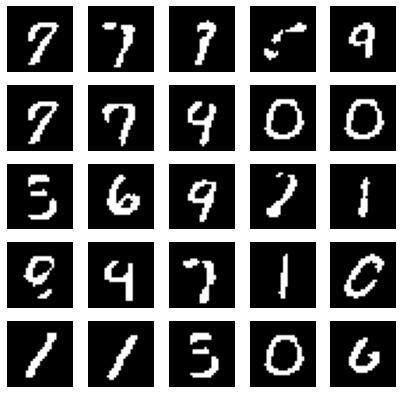

Images with 50% pixels removed


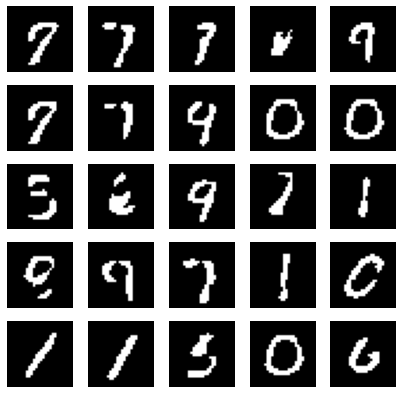

Images with 80% pixels removed


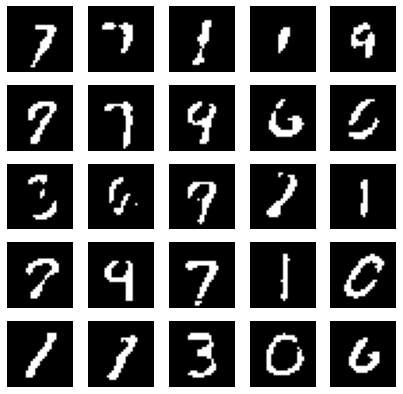

In [0]:
rbm1 = RBM(n_visible=img_size, n_hidden=20)
rbm1.train(X_train, steps=10000)
rbm1.generate_images(X_test, p=[20,50,80])

### RBM with 100 hidden nodes

Training the RBM for 10000 steps with batch size 32...
0 1000 2000 3000 4000 5000 6000 7000 8000 9000 DONE
Generating some images from the trained RBM
Images with 20% pixels removed


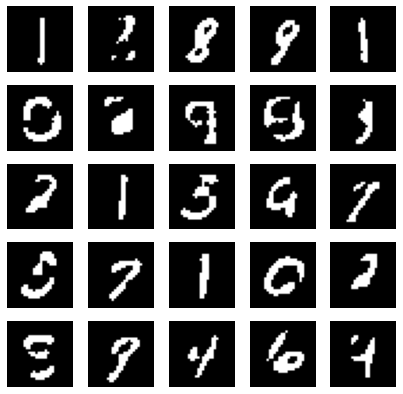

Images with 50% pixels removed


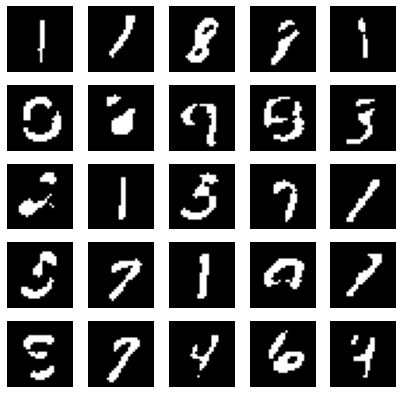

Images with 80% pixels removed


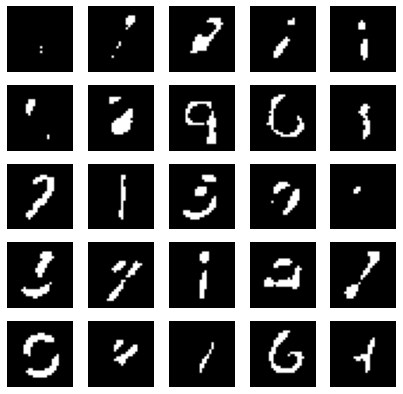

In [0]:
rbm2 = RBM(n_visible=img_size, n_hidden=100)
rbm2.train(X_train, steps=10000)
rbm2.generate_images(X_test, p=[20,50,80])

### RBM with 500 hidden nodes

Training the RBM for 10000 steps with batch size 32...
0 1000 2000 3000 4000 5000 6000 7000 8000 9000 DONE
Generating some images from the trained RBM
Images with 20% pixels removed


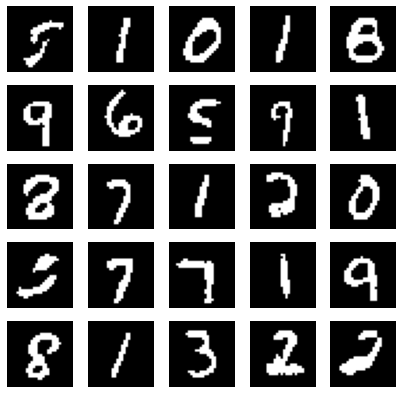

Images with 50% pixels removed


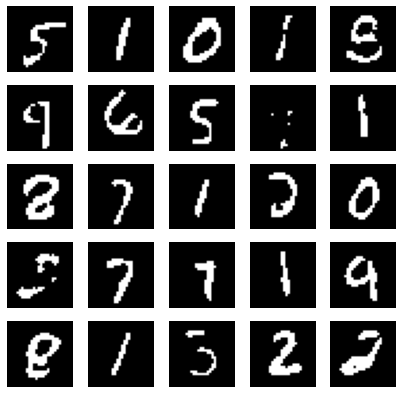

Images with 80% pixels removed


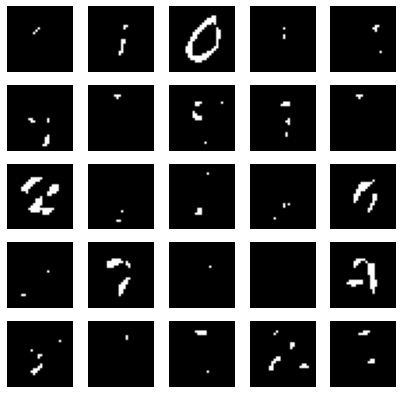

In [0]:
rbm3 = RBM(n_visible=img_size, n_hidden=500)
rbm3.train(X_train, steps=10000)
rbm3.generate_images(X_test, p=[20,50,80])

### References

1. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern Classification. John Wiley & Sons, 2012. <br>
2. CSE 555 Intoduction to Pattern Recognition Lecture Slides by Prof. Wen Dong <br>
3. https://medium.com/datatype/restricted-boltzmann-machine-a-complete-analysis-part-3-contrastive-divergence-algorithm-3d06bbebb10c <br>
4. http://deeplearning.net/tutorial/rbm.html <br>
5. http://yann.lecun.com/exdb/mnist/